<a href="https://colab.research.google.com/github/dec4der/Diamond_Price_Predictor/blob/main/diamond_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
path = "/content/diamond.csv"
df = pd.read_csv(path)
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [5]:
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [6]:
pd.unique(df.Cut)

array(['Ideal', 'Very Good', 'Fair', 'Good', 'Signature-Ideal'],
      dtype=object)

In [7]:
pd.unique(df.Color)

array(['H', 'E', 'G', 'D', 'F', 'I'], dtype=object)

In [8]:
pd.unique(df.Clarity)

array(['SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF', 'FL'], dtype=object)

In [9]:
pd.unique(df.Polish)

array(['VG', 'ID', 'EX', 'G'], dtype=object)

In [10]:
pd.unique(df.Symmetry)

array(['EX', 'ID', 'VG', 'G'], dtype=object)

In [11]:
pd.unique(df.Report)

array(['GIA', 'AGSL'], dtype=object)

In [12]:
df.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Scatterplots for all attributes

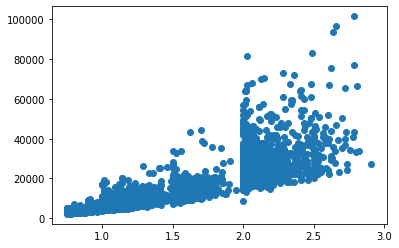

In [13]:
plt.scatter(df['Carat Weight'], df['Price'])

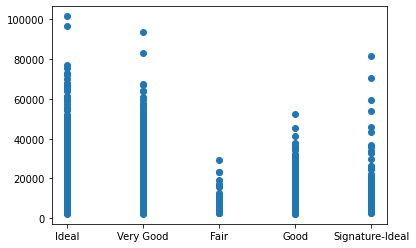

In [14]:
plt.scatter(df['Cut'], df['Price'])

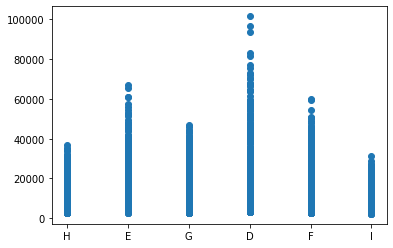

In [15]:
plt.scatter(df['Color'], df['Price'])

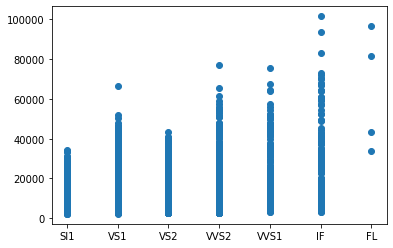

In [16]:
plt.scatter(df['Clarity'], df['Price'])

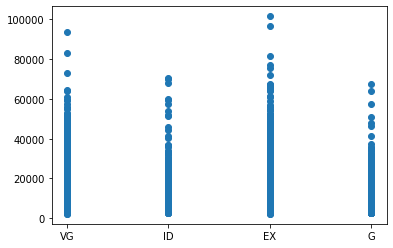

In [17]:
plt.scatter(df['Polish'], df['Price'])

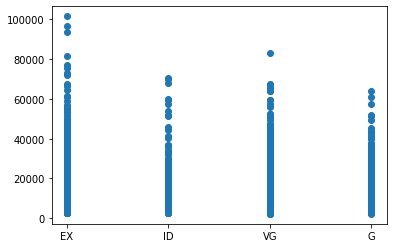

In [18]:
plt.scatter(df['Symmetry'], df['Price'])

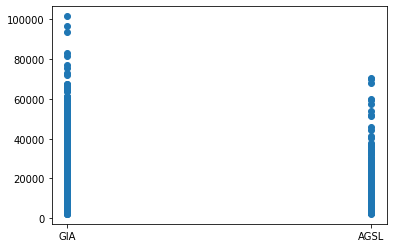

In [19]:
plt.scatter(df['Report'], df['Price'])

Bar graphs for all attributes

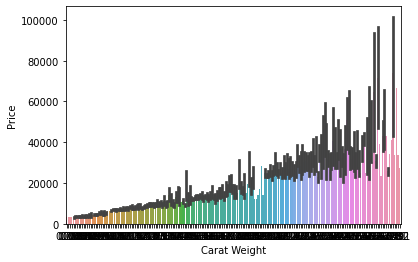

In [20]:
import seaborn as snb
snb.barplot(x='Carat Weight',y = 'Price', data=df)
plt.show()

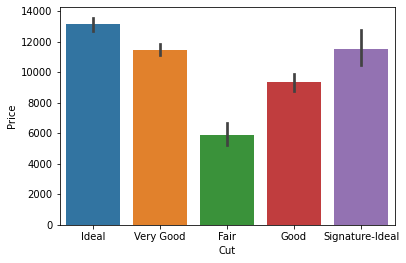

In [21]:
import seaborn as snb
snb.barplot(x='Cut',y = 'Price', data=df)
plt.show()

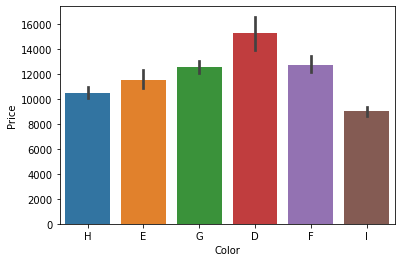

In [22]:
snb.barplot(x='Color',y = 'Price', data=df)
plt.show()

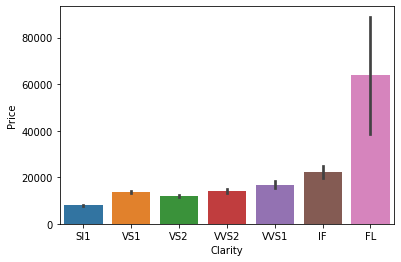

In [23]:
import seaborn as snb
snb.barplot(x='Clarity',y = 'Price', data=df)
plt.show()

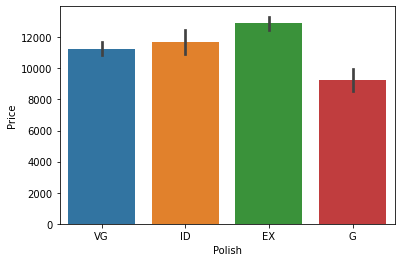

In [24]:
import seaborn as snb
snb.barplot(x='Polish',y = 'Price', data=df)
plt.show()

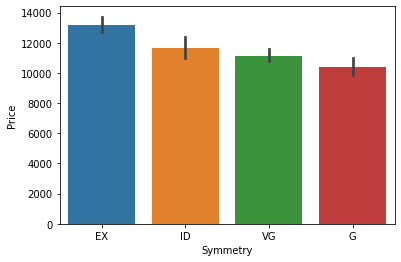

In [25]:
import seaborn as snb
snb.barplot(x='Symmetry',y = 'Price', data=df)
plt.show()

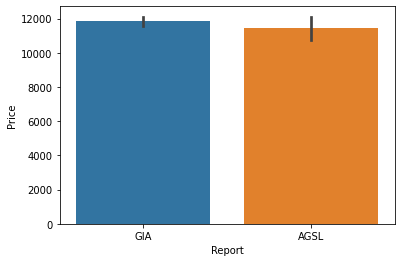

In [26]:
import seaborn as snb
snb.barplot(x='Report',y = 'Price', data=df)
plt.show()

Deleting the report column, since it has no significance

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
dfle = df
dfle.Cut= le.fit_transform(dfle.Cut)
dfle.Color = le.fit_transform(dfle.Color)
dfle.Clarity = le.fit_transform(dfle.Clarity)
dfle.Polish = le.fit_transform(dfle.Polish)
dfle.Symmetry = le.fit_transform(dfle.Symmetry)
dfle.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,GIA,5169
1,0.83,2,4,3,2,2,AGSL,3470
2,0.85,2,4,2,0,0,GIA,3183
3,0.91,2,1,2,3,3,GIA,4370
4,0.83,2,3,2,0,0,GIA,3171


In [29]:
X = dfle[['Carat Weight','Cut','Color','Clarity','Polish','Symmetry']]
X.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry
0,1.10,2,4,2,3,0
1,0.83,2,4,3,2,2
2,0.85,2,4,2,0,0
3,0.91,2,1,2,3,3
4,0.83,2,3,2,0,0


In [30]:
Y = dfle[['Price']]
Y.head()

,Price
0,5169
1,3470
2,3183
3,4370
4,3171


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [32]:
len(X_test)

1800

In [33]:
len(X_train)

4200

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
model.fit(X_train,Y_train)

LinearRegression()

In [60]:
model.score(X_train,Y_train)

0.8072433605703624

In [61]:
model.score(X_test,Y_test)

0.8068637691495508

In [62]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=100, max_iter=500, tol=0.25)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=100, max_iter=500, tol=0.25)

In [63]:
model.score(X_test, Y_test)

0.8068637691495508

In [64]:
model.score(X_train,Y_train)

0.8072433605703624

In [71]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [72]:
model.score(X_train,Y_train)

0.9072598694979893

In [73]:
model.score(X_test,Y_test)

0.814882683617602